<a href="https://colab.research.google.com/github/chrismun/torchdrug/blob/main/pred_target_name.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import torch
from numpy import array
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

from scipy.special import softmax

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from itertools import chain
from pprint import pprint as pprint
from sklearn.metrics import f1_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [13]:
pred_df = pd.DataFrame(engine_preds)

In [14]:

predictions = [np.argmax(i) for i in engine_preds]
print(predictions)

[4, 2, 4, 2, 8, 1, 2, 2, 2, 2, 1, 2, 2, 2, 11, 5, 4, 1, 11, 4, 4, 1, 1, 2, 2, 8, 11, 8, 9, 4, 11, 6, 4, 8, 4, 2, 2, 2, 10, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 4, 4, 6, 4, 4, 2, 2, 10, 5, 4, 2, 4, 2, 5, 2, 4, 4, 2, 2, 4, 4, 5, 11, 2, 13, 2, 0, 2, 5, 2, 4, 8, 2, 2, 5, 4, 4, 6, 2, 4, 6, 4, 2, 2, 4, 1, 4, 0, 2, 2, 2, 2, 2, 10, 2, 4, 4, 2, 2, 7, 4, 7, 2, 4, 4, 10, 6, 2, 1, 5, 4, 11, 2, 4, 13, 2, 8, 2, 4, 13, 11, 2, 1, 8, 13, 2, 8, 4, 4, 2, 1, 4, 8, 2, 2, 2, 5, 5, 2, 2, 0, 2, 5, 8, 13, 4, 4, 2, 6, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 6, 2, 6, 6, 2, 1, 7, 5, 2, 5, 12, 4, 2, 2, 8, 8, 2, 4, 2, 2, 8, 4, 8, 2, 8, 4, 12, 2, 4, 13, 2, 4, 5, 1, 2, 2, 4, 2, 2, 2, 8, 6, 11, 5, 2, 4, 8, 6, 2, 2, 1, 2, 2, 9, 2, 2, 2, 2, 2, 2, 1, 11, 4, 2, 4, 5, 2, 2, 2, 2, 2, 1, 5, 2, 2, 2, 2, 11, 4, 4, 2, 2, 1, 2, 4, 13, 2, 2, 2, 6, 5, 5, 11, 2, 1, 8, 4, 1, 2, 8, 1, 12, 4, 5, 1, 2, 8, 2, 6, 2, 2, 2, 2, 0, 5, 4, 4, 6, 4, 5, 8, 2, 2, 2, 4, 5, 4, 2, 2, 6, 2, 8, 4, 2, 8, 2, 13, 2, 5, 2, 1, 5, 13, 2, 0, 4, 8, 5, 5, 1, 7, 2, 

In [15]:
targets = [ i.item() for i in engine_targets]
print(targets)

[4, 13, 4, 2, 8, 1, 2, 2, 2, 2, 1, 2, 2, 2, 11, 5, 5, 1, 11, 4, 6, 1, 1, 2, 2, 8, 11, 8, 9, 4, 11, 6, 4, 8, 4, 2, 2, 2, 10, 2, 4, 2, 2, 2, 2, 2, 2, 1, 2, 4, 4, 12, 4, 4, 2, 2, 10, 5, 4, 2, 4, 2, 5, 2, 4, 4, 2, 2, 4, 4, 5, 11, 2, 13, 2, 0, 2, 5, 4, 4, 8, 2, 2, 5, 4, 4, 6, 2, 4, 6, 4, 2, 2, 4, 1, 4, 0, 2, 2, 2, 2, 10, 8, 2, 4, 4, 2, 2, 7, 4, 7, 2, 4, 4, 10, 6, 2, 1, 5, 4, 11, 2, 4, 13, 2, 8, 2, 4, 13, 4, 2, 6, 8, 13, 2, 8, 4, 6, 2, 1, 4, 8, 2, 2, 2, 5, 10, 2, 2, 0, 2, 5, 8, 13, 0, 4, 2, 6, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 6, 2, 1, 6, 2, 1, 7, 5, 2, 5, 12, 4, 2, 2, 8, 8, 2, 4, 2, 2, 13, 11, 8, 2, 8, 4, 12, 2, 4, 13, 2, 4, 5, 1, 2, 2, 4, 2, 2, 10, 8, 6, 11, 5, 2, 4, 8, 6, 2, 2, 1, 2, 2, 5, 2, 2, 2, 2, 2, 2, 1, 2, 4, 2, 4, 5, 2, 2, 2, 2, 2, 1, 5, 1, 2, 2, 2, 4, 4, 4, 2, 2, 1, 2, 6, 13, 2, 2, 2, 4, 5, 5, 11, 2, 1, 8, 4, 1, 2, 8, 1, 12, 6, 5, 1, 2, 8, 2, 6, 2, 2, 2, 2, 0, 4, 4, 4, 6, 4, 5, 8, 2, 2, 2, 4, 5, 6, 10, 2, 4, 2, 8, 4, 2, 8, 2, 13, 2, 5, 2, 1, 5, 13, 2, 0, 4, 8, 5, 5, 1, 7,

In [16]:
def get_acc(prediction,target):
  assert len(prediction) == len(target), "Lists must be of the same length."

  # Count the number of matches
  matches = sum(1 for p, t in zip(prediction, target) if p == t)

  # Calculate accuracy
  accuracy = matches / len(prediction)

  print(f"Accuracy: {accuracy*100:.2f}%")

get_acc(predictions,targets)

Accuracy: 92.49%


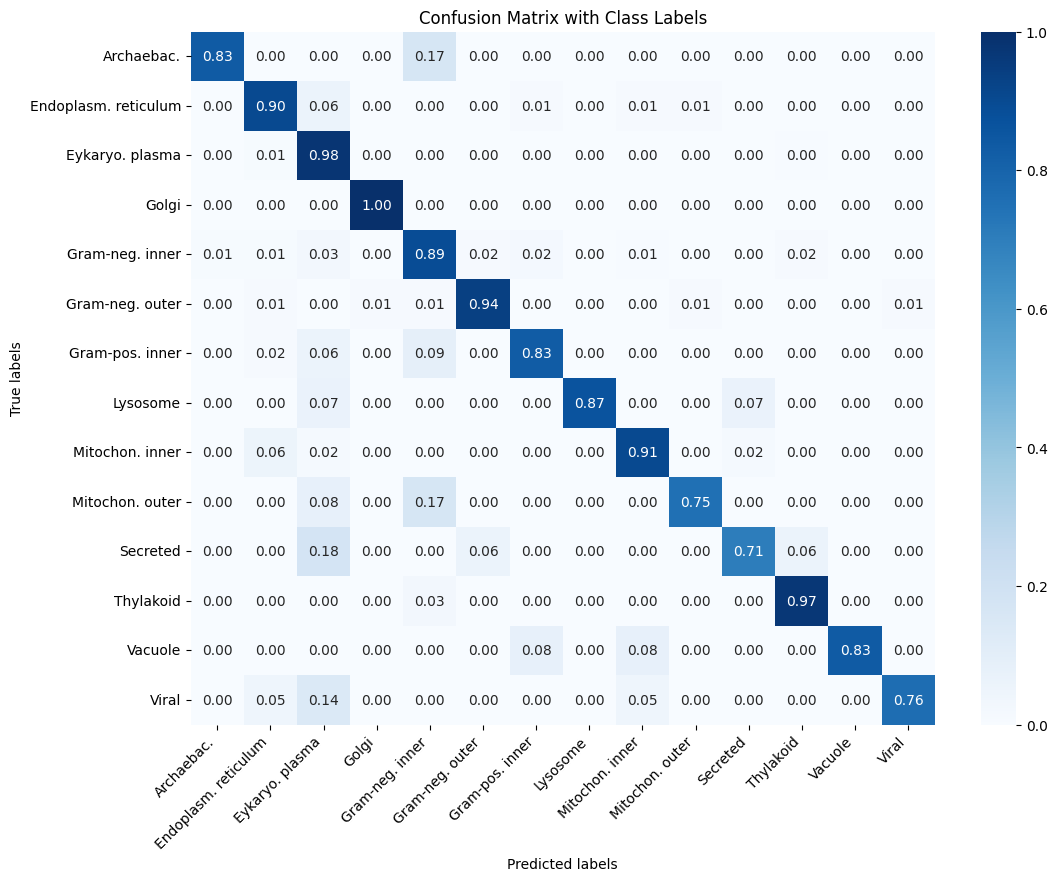

In [18]:


# class_dict = {'Archaebac.': 0, 'Endoplasm. reticulum': 1, 'Eykaryo. plasma': 2, 'Gram-neg. inner': 3, 'Gram-neg. outer': 4, 'Gram-pos. inner': 5, 'Mitochon. inner': 6, 'Thylakoid': 7, 'Viral': 8}

label_dict = {'Archaebac.': 0, 'Endoplasm. reticulum': 1, 'Eykaryo. plasma': 2, 'Golgi': 3, 'Gram-neg. inner': 4, 'Gram-neg. outer': 5, 'Gram-pos. inner': 6, 'Lysosome': 7, 'Mitochon. inner': 8, 'Mitochon. outer': 9, 'Secreted': 10, 'Thylakoid': 11, 'Vacuole': 12, 'Viral': 13}


# Calculate the confusion matrix
cm = confusion_matrix(targets, predictions)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Getting class labels from the dictionary, sorted by their corresponding numerical values
labels = [label for label, _ in sorted(label_dict.items(), key=lambda item: item[1])]

# Plot the confusion matrix
plt.figure(figsize=(12, 9))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with Class Labels')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0, va='center')
plt.show()


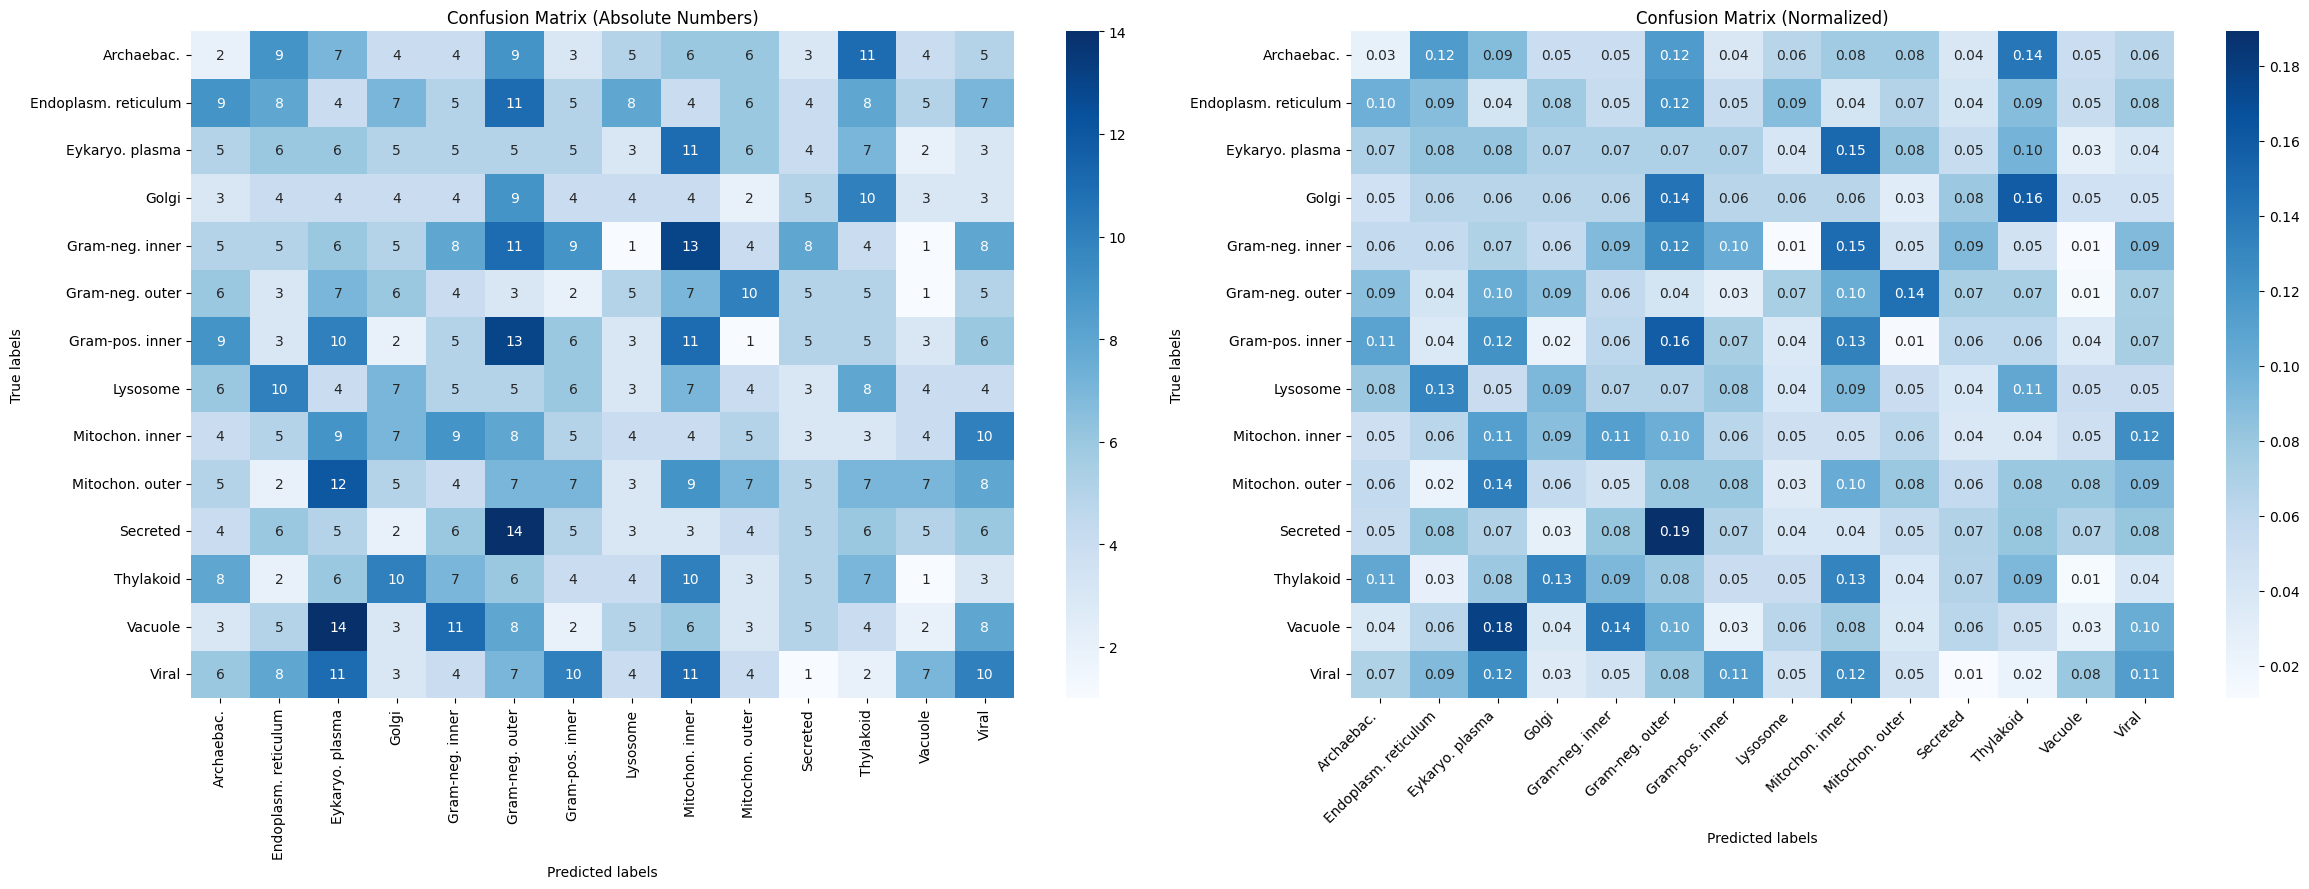

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming 'targets' and 'predictions' are defined
cm = confusion_matrix(targets, predictions)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Getting class labels from the dictionary, sorted by their corresponding numerical values
labels = [label for label, _ in sorted(label_dict.items(), key=lambda item: item[1])]

# Plotting both confusion matrices side by side
fig, ax = plt.subplots(1, 2, figsize=(24, 9))  # 1 row, 2 columns

# Absolute confusion matrix
sns.heatmap(cm, ax=ax[0], annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
ax[0].set_title('Confusion Matrix (Absolute Numbers)')
ax[0].set_xlabel('Predicted labels')
ax[0].set_ylabel('True labels')

# Normalized confusion matrix
sns.heatmap(cm_normalized, ax=ax[1], annot=True, fmt='.2f', cmap='Blues', xticklabels=labels, yticklabels=labels)
ax[1].set_title('Confusion Matrix (Normalized)')
ax[1].set_xlabel('Predicted labels')
ax[1].set_ylabel('True labels')

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [23]:
pred_df.shape

(1105, 14)

In [24]:
prob = softmax(pred_df, axis = 1)
prob.shape


(1105, 14)

In [25]:
len(engine_eval_name)

1105

In [26]:
len(targets)

1105

In [27]:
len(predictions)

1105

In [28]:
label_dict = {'Archaebac.': 0, 'Endoplasm. reticulum': 1, 'Eykaryo. plasma': 2, 'Golgi': 3, 'Gram-neg. inner': 4, 'Gram-neg. outer': 5, 'Gram-pos. inner': 6, 'Lysosome': 7, 'Mitochon. inner': 8, 'Mitochon. outer': 9, 'Secreted': 10, 'Thylakoid': 11, 'Vacuole': 12, 'Viral': 13}

reverse_label_dict = {v: k for k, v in label_dict.items()}

print(reverse_label_dict)


{0: 'Archaebac.', 1: 'Endoplasm. reticulum', 2: 'Eykaryo. plasma', 3: 'Golgi', 4: 'Gram-neg. inner', 5: 'Gram-neg. outer', 6: 'Gram-pos. inner', 7: 'Lysosome', 8: 'Mitochon. inner', 9: 'Mitochon. outer', 10: 'Secreted', 11: 'Thylakoid', 12: 'Vacuole', 13: 'Viral'}


In [29]:


# pred = np.load("/Users/bivekpokhrel/Desktop/bio/pdb_15/pred25")
# names = np.load('/Users/bivekpokhrel/Desktop/bio/pdb_15/eval_name22', allow_pickle=True)
# true_labels = np.load('/Users/bivekpokhrel/Desktop/bio/pdb_15/target25')[0]
# # names = np.load('/Users/bivekpokhrel/Desktop/bio/withpdb_name/pp_name13', allow_pickle=True)
# protein_csv = pd.read_csv('/Users/bivekpokhrel/PycharmProjects/database/data/proteins-2023-04-15.csv')
# print(f' names shape : {names.shape}')
# print(len(names[0]))



# label_dict = {
#     0: 'Archaebac.',
#     1: 'Endoplasm. reticulum',
#     2: 'Eykaryo. plasma',
#     3: 'Gram-neg. inner',
#     4: 'Gram-neg. outer',
#     5: 'Gram-pos. inner',
#     6: 'Mitochon. inner',
#     7: 'Thylakoid',
#     8: 'Viral'
# }

# cl2 = {'Archaebac.': 0,
# 'Endoplasm. reticulum': 1,
# 'Eykaryo. plasma': 2,
# 'Gram-neg. inner': 3,
# 'Gram-neg. outer': 4,
# 'Gram-pos. inner': 5,
# 'Mitochon. inner': 6,
# 'Thylakoid': 7,
# 'Viral': 8}



# assert names[0].shape[0] == pred.shape[0] == true_labels.shape[0]
prob_name = {}
prob_name2 = {}
pred_class_name = {}
target_class_name = {}

data = []
for i in range(prob.shape[0]):
  # prob_name[engine_eval_name[i]] = np.max(prob[i]), np.partition(prob[i], -2, axis =-1)[-2], reverse_label_dict[np.argmax(prob[i])], reverse_label_dict[np.argpartition(prob[i], -2)[-2]], reverse_label_dict[targets[i]]
  pdbid = engine_eval_name[i]
  max_prob = np.max(prob[i])
  second_max_prob = np.partition(prob[i], -2, axis=-1)[-2]
  predicted_class = reverse_label_dict[np.argmax(prob[i])]
  second_predicted_class = reverse_label_dict[np.argpartition(prob[i], -2)[-2]]
  true_class = reverse_label_dict[targets[i]]
  data.append([ pdbid,  max_prob, second_max_prob,  predicted_class,  second_predicted_class,  true_class])


  # prob_name2[engine_eval_name[i]] = np.max(prob[i]), np.argmax(prob[i]), targets[i]

  # pred_class_name[engine_eval_name[i]] = label_dict[np.argmax(prob[i])]
  # target_class_name[engine_eval_name[i]] = label_dict[targets[i]]
prob_df = pd.DataFrame(data, columns=['pdbid', 'Max_prob', 'Second_max_prob', 'predicted_class', 'Second_predicted_class', 'True_class'])

# print(prob_name)
# print('.........................')
# print(prob_name2)
# print('.........................')
# print('.........................')
# print('.........................')
# print('.........................')
# count = 0
# for i in range(prob.shape[0]):
#     if np.argmax(prob[i]) == targets[i]:
#         count +=1
# print('alt_acc')
# print(count/prob.shape[0])



# ### to give the name according to the less probability ###

# # threshold = 0.35
# # less_prob = [(key, value) for key,value in prob_name.items() if value[0] < threshold]
# # print('sorted')
# # print('for min case')
# # print(less_prob)
# # print('.........................')
# # print('.........................')
# # print('.........................')
# # s_least_prob = sorted(less_prob, key = lambda k : k[1], reverse=False)
# # print(s_least_prob)
# # s_names = [key[0] for key in s_least_prob ]
# # print(s_names)




# ### to print the confidence of the
# prob_df['Confidence'] = 2*(prob_df['Max_prob'] - prob_df['Second_max_prob'])/(prob_df['Max_prob'] + prob_df['Second_max_prob'])
# print(prob_df.head())
# sorted_prob_df = prob_df.sort_values(by='Confidence')
# pprint(sorted_prob_df.head())
# count = 0
# # sorted_prob_df.to_excel('/Users/bivekpokhrel/Desktop/bio/pdb_15/confidence_pdb15a.xlsx', sheet_name='Sheet1', header=True, index=False) # to save
# # for pdb in sorted_prob_df['pdbid']:
# #     print(pdb)
# #     print(protein_csv.loc[protein_csv['pdbid'] == pdb, 'membrane_name_cache'])
# #     print(sorted_prob_df.loc[sorted_prob_df['pdbid'] == pdb, 'True_class'])

# #     if protein_csv.loc[protein_csv['pdbid'] == pdb, 'membrane_name_cache'] == sorted_prob_df.loc[sorted_prob_df['pdbid'] == pdb, 'True_class']:
# #         count +=1

# # print(count)



In [30]:

count = 0
for i in range(prob.shape[0]):
    if np.argmax(prob[i]) == targets[i]:
        count +=1
print('alt_acc')
print(count/prob.shape[0])



### to give the name according to the less probability ###

# threshold = 0.35
# less_prob = [(key, value) for key,value in prob_name.items() if value[0] < threshold]
# print('sorted')
# print('for min case')
# print(less_prob)
# print('.........................')
# print('.........................')
# print('.........................')
# s_least_prob = sorted(less_prob, key = lambda k : k[1], reverse=False)
# print(s_least_prob)
# s_names = [key[0] for key in s_least_prob ]
# print(s_names)




### to print the confidence of the
prob_df['Confidence'] = 2*(prob_df['Max_prob'] - prob_df['Second_max_prob'])/(prob_df['Max_prob'] + prob_df['Second_max_prob'])
prob_df['Success'] = prob_df['predicted_class'] == prob_df['True_class']

sorted_prob_df = prob_df.sort_values(by='Confidence')
pprint(sorted_prob_df[:20])

sorted_prob_df.to_excel('/content/drive/MyDrive/Bio/confidence_pdb15.xlsx', sheet_name='Sheet1', header=True, index=False) # to save
# for pdb in sorted_prob_df['pdbid']:

#     print(protein_csv.loc[protein_csv['pdbid'] == pdb, 'membrane_name_cache'])
#     print(sorted_prob_df.loc[sorted_prob_df['pdbid'] == pdb, 'True_class'])

#     if protein_csv.loc[protein_csv['pdbid'] == pdb, 'membrane_name_cache'] == sorted_prob_df.loc[sorted_prob_df['pdbid'] == pdb, 'True_class']:
#         count +=1

# print(count)



alt_acc
0.06787330316742081
     pdbid  Max_prob  Second_max_prob       predicted_class  \
620   7nkk  0.195016         0.194948       Eykaryo. plasma   
382   6knm  0.097799         0.097714       Gram-pos. inner   
983   6xkv  0.168859         0.168645       Gram-neg. outer   
406   6k4j  0.088545         0.088349                 Viral   
761   6i6h  0.088003         0.087783            Archaebac.   
298   4rfs  0.099340         0.099073       Eykaryo. plasma   
1035  3b4r  0.097877         0.097596                 Viral   
357   6ith  0.079883         0.079616       Gram-neg. inner   
603   3g9w  0.086506         0.086214       Eykaryo. plasma   
174   6wve  0.090505         0.090167       Mitochon. inner   
511   6wva  0.102871         0.102474                 Golgi   
353   6v0e  0.108422         0.107985                 Golgi   
766   7mew  0.161747         0.161001            Archaebac.   
925   7nho  0.165679         0.164903                 Viral   
347   5vrf  0.157997       

Archaebac.:  F1 Score = 0.03
Endoplasm. reticulum:  F1 Score = 0.10
Eykaryo. plasma:  F1 Score = 0.07
Golgi:  F1 Score = 0.06
Gram-neg. inner:  F1 Score = 0.09
Gram-neg. outer:  F1 Score = 0.03
Gram-pos. inner:  F1 Score = 0.08
Lysosome:  F1 Score = 0.05
Mitochon. inner:  F1 Score = 0.04
Mitochon. outer:  F1 Score = 0.09
Secreted:  F1 Score = 0.07
Thylakoid:  F1 Score = 0.09
Vacuole:  F1 Score = 0.03
Viral:  F1 Score = 0.11


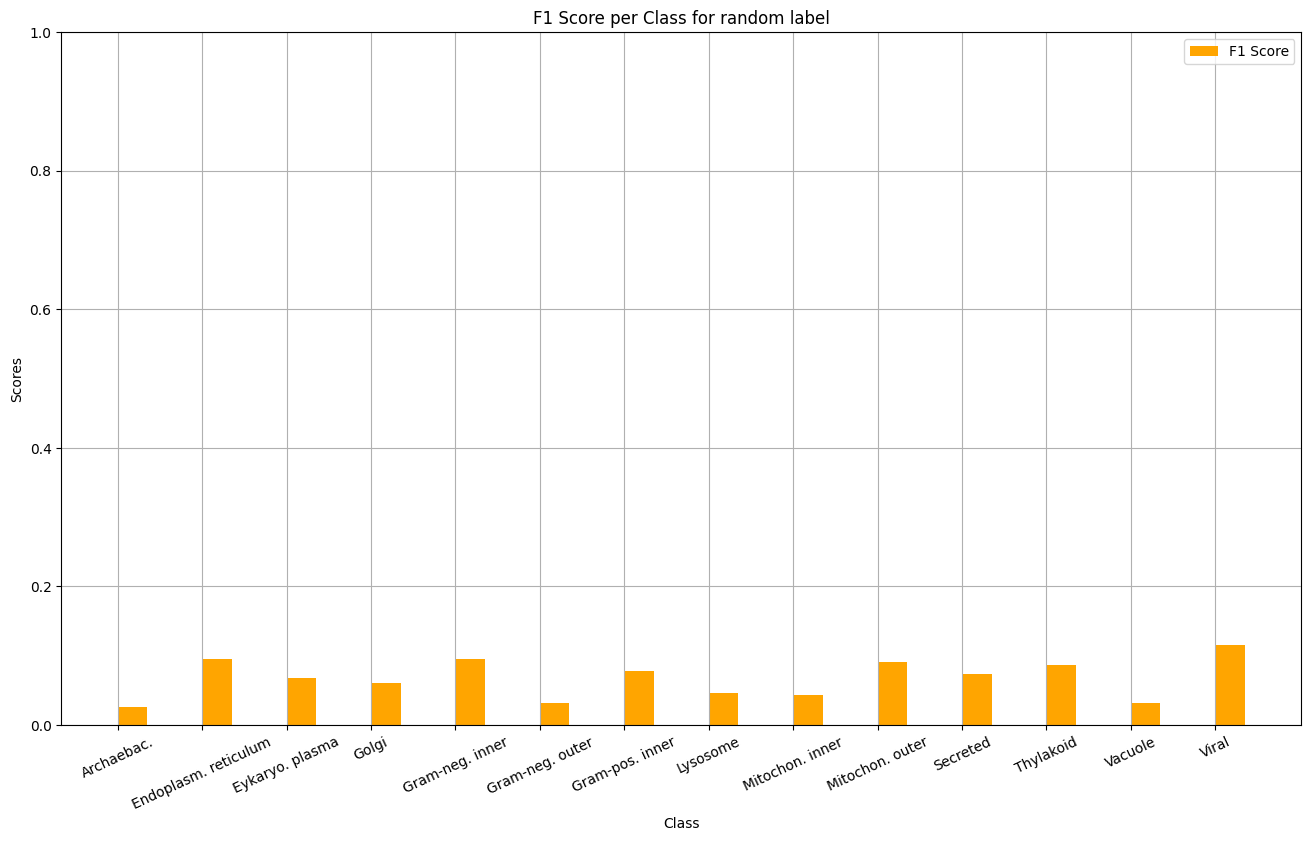

In [38]:
from collections import defaultdict
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming `targets` and `predictions` are defined and `reverse_label_dict` maps numeric labels to class names
# Initialize a dictionary to store TP, FP, FN, and TN for each class
class_metrics = defaultdict(lambda: {'TP': 0, 'FP': 0, 'FN': 0, 'TN': 0})

# Populate the dictionary with counts
for target, prediction in zip(targets, predictions):
    for class_label in reverse_label_dict.values():
        if class_label == reverse_label_dict.get(target):
            if target == prediction:
                class_metrics[class_label]['TP'] += 1  # True Positive
            else:
                class_metrics[class_label]['FN'] += 1  # False Negative
        else:
            if class_label == reverse_label_dict.get(prediction):
                class_metrics[class_label]['FP'] += 1  # False Positive
            else:
                class_metrics[class_label]['TN'] += 1  # True Negative

# Calculate accuracy and F1 score for each class
class_names = []
accuracies = []
f1_scores = []

for class_name, metrics in class_metrics.items():
    # accuracy = (metrics['TP'] + metrics['TN']) / sum(metrics.values())
    precision = metrics['TP'] / (metrics['TP'] + metrics['FP']) if (metrics['TP'] + metrics['FP']) > 0 else 0
    recall = metrics['TP'] / (metrics['TP'] + metrics['FN']) if (metrics['TP'] + metrics['FN']) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    class_names.append(class_name)
    # accuracies.append(accuracy)
    f1_scores.append(f1)
    print(f"{class_name}:  F1 Score = {f1:.2f}")

# Plotting
x = np.arange(len(class_names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 9))
# rects1 = ax.bar(x - width/2, accuracies, width, label='Accuracy', color='skyblue')
rects2 = ax.bar(x + width/2, f1_scores, width, label='F1 Score', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Class')
ax.set_ylabel('Scores')
ax.set_title('F1 Score per Class for random label')
ax.set_xticks(x)
ax.set_xticklabels(class_names, rotation=25)
ax.set_ylim(0, 1)  # Ensure the y-axis starts at 0 and ends at 1 for scores
ax.legend()
plt.grid()
plt.show()


 Gram-neg. inner: Accuracy = 9.09%, Correct = 8, Total = 88
 Mitochon. inner: Accuracy = 5.00%, Correct = 4, Total = 80
 Gram-pos. inner: Accuracy = 7.32%, Correct = 6, Total = 82
 Endoplasm. reticulum: Accuracy = 8.79%, Correct = 8, Total = 91
 Eykaryo. plasma: Accuracy = 8.22%, Correct = 6, Total = 73
 Viral: Accuracy = 11.36%, Correct = 10, Total = 88
 Vacuole: Accuracy = 2.53%, Correct = 2, Total = 79
 Archaebac.: Accuracy = 2.56%, Correct = 2, Total = 78
 Lysosome: Accuracy = 3.95%, Correct = 3, Total = 76
 Secreted: Accuracy = 6.76%, Correct = 5, Total = 74
 Mitochon. outer: Accuracy = 7.95%, Correct = 7, Total = 88
 Thylakoid: Accuracy = 9.21%, Correct = 7, Total = 76
 Gram-neg. outer: Accuracy = 4.35%, Correct = 3, Total = 69
 Golgi: Accuracy = 6.35%, Correct = 4, Total = 63


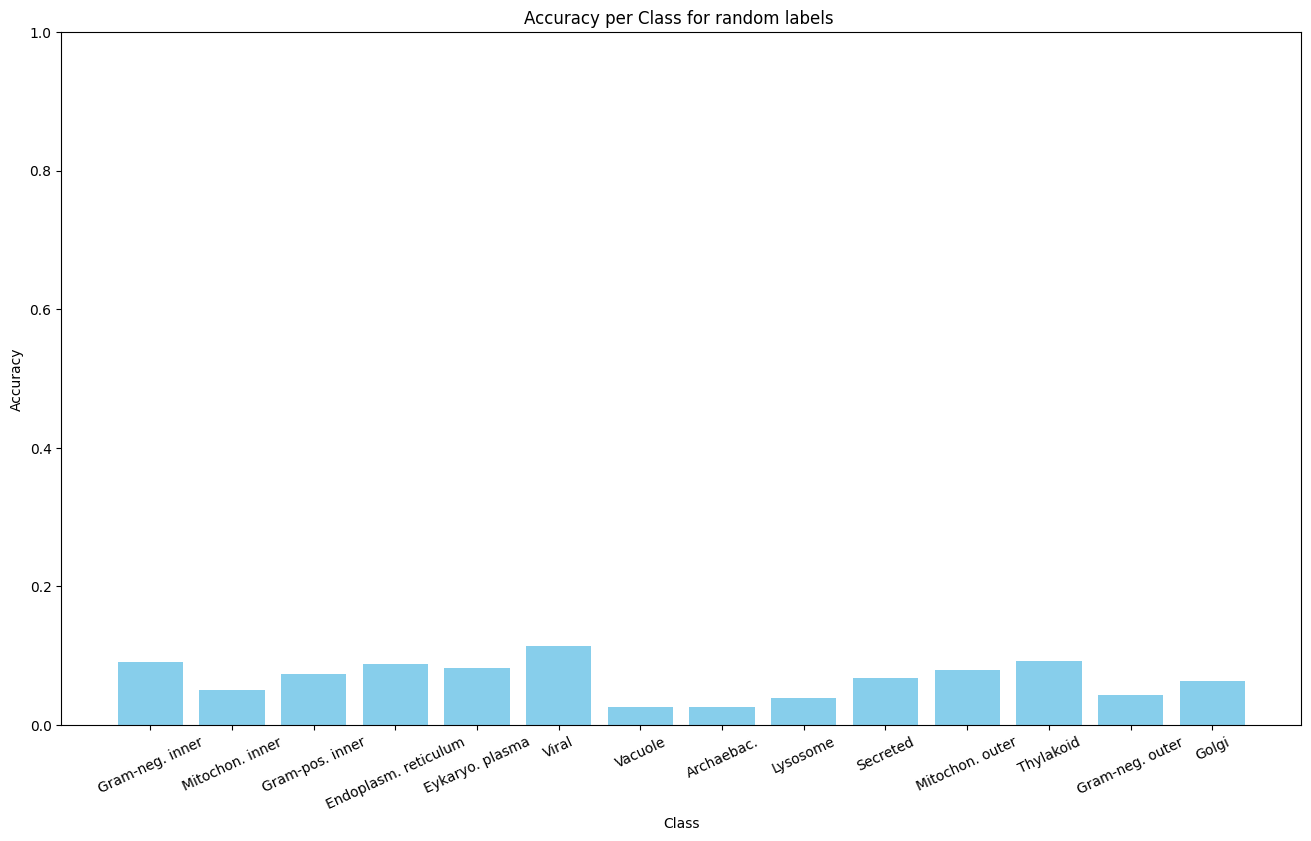

In [37]:
from collections import defaultdict

# Create a dictionary to store correct and total counts for each class
class_counts = defaultdict(lambda: {'correct': 0, 'total': 0})

# Loop through targets and predictions
for target, prediction in zip(targets, predictions):
    class_name = reverse_label_dict.get(target, 'Unknown')
    class_counts[class_name]['total'] += 1
    if target == prediction:
        class_counts[class_name]['correct'] += 1

# Print accuracy for each class
for class_name, counts in class_counts.items():
    accuracy = counts['correct'] / counts['total'] if counts['total'] > 0 else 0.0
    print(f" {class_name}: Accuracy = {accuracy:.2%}, Correct = {counts['correct']}, Total = {counts['total']}")

class_names = list(class_counts.keys())
accuracies = [counts['correct'] / counts['total'] if counts['total'] > 0 else 0.0 for counts in class_counts.values()]

# Plotting
plt.figure(figsize=(16, 9))
plt.bar(class_names, accuracies, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Accuracy per Class for random labels ')
plt.ylim(0, 1)  # Ensure the y-axis starts at 0 and ends at 1 for accuracy
plt.xticks(rotation=25)  # Rotate class names for better visibility
plt.show()

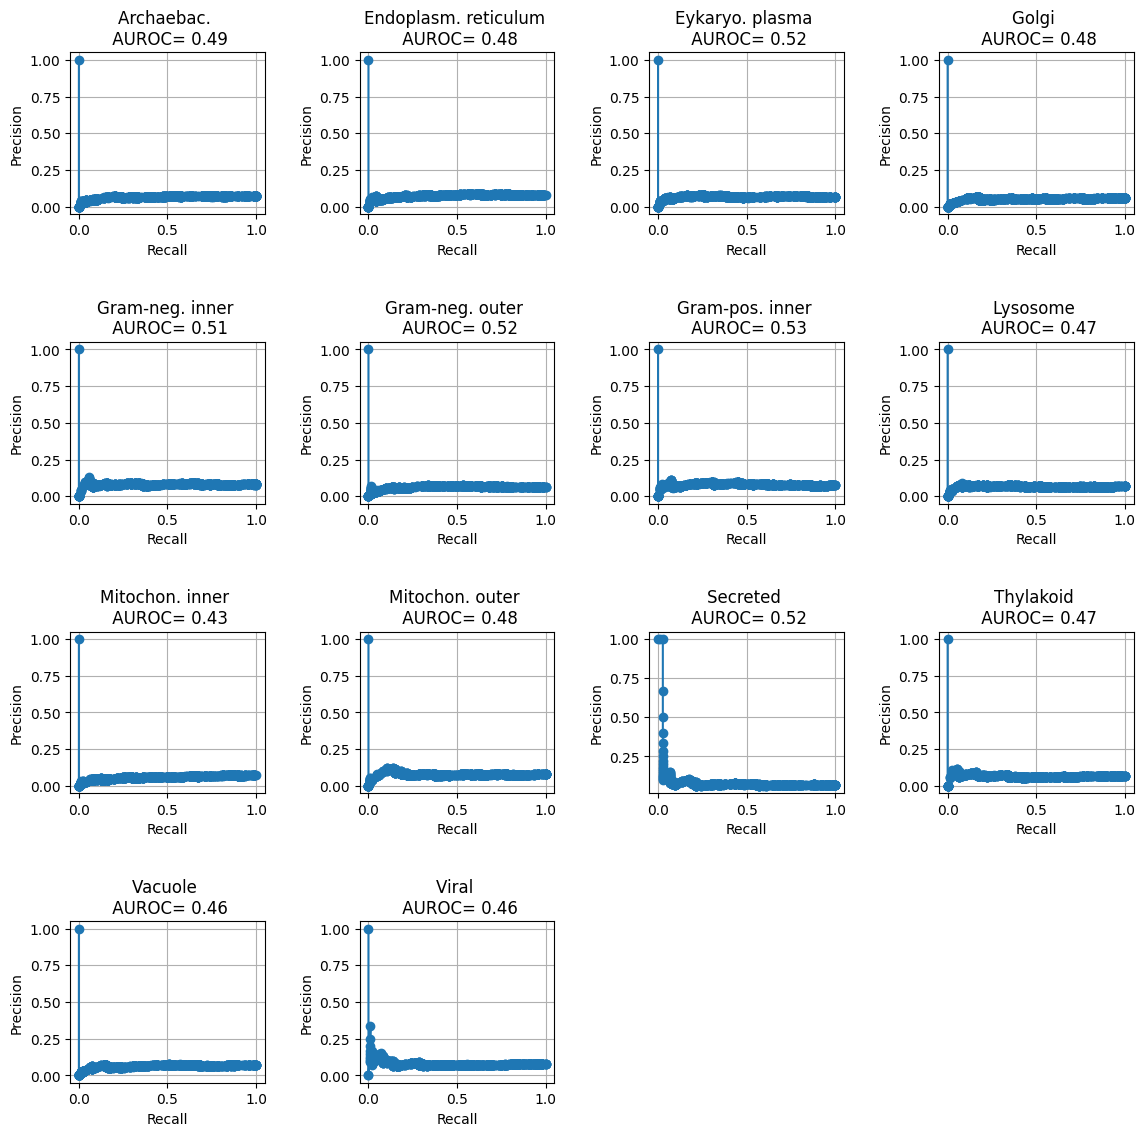

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_auc_score
import numpy as np




# Number of classes
num_classes = prob.shape[1]


# Calculate the number of rows needed
num_rows = (num_classes + 3) // 4  # Maximum of 4 curves per row

# Create a plot with 4 subplots in each row
plt.figure(figsize=(12, 3 * num_rows))

for class_idx in range(num_classes):
    class_y_true = (np.array(targets) == class_idx).astype(int)
    class_y_pred_prob = prob[:, class_idx]

    precision, recall, thresholds = precision_recall_curve(class_y_true, class_y_pred_prob)
    auroc = roc_auc_score(class_y_true, class_y_pred_prob)


    # Plot precision-recall curve for each class
    plt.subplot(num_rows, 4, class_idx + 1)
    plt.plot(recall, precision, marker='o', linestyle='-')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{reverse_label_dict[class_idx]} \n AUROC= {auroc:.2f}')
    plt.grid(True)

plt.tight_layout(pad=3.0)
plt.show()


In [ ]:
np.array(targets) == 3

array([False, False, False, ..., False, False, False])

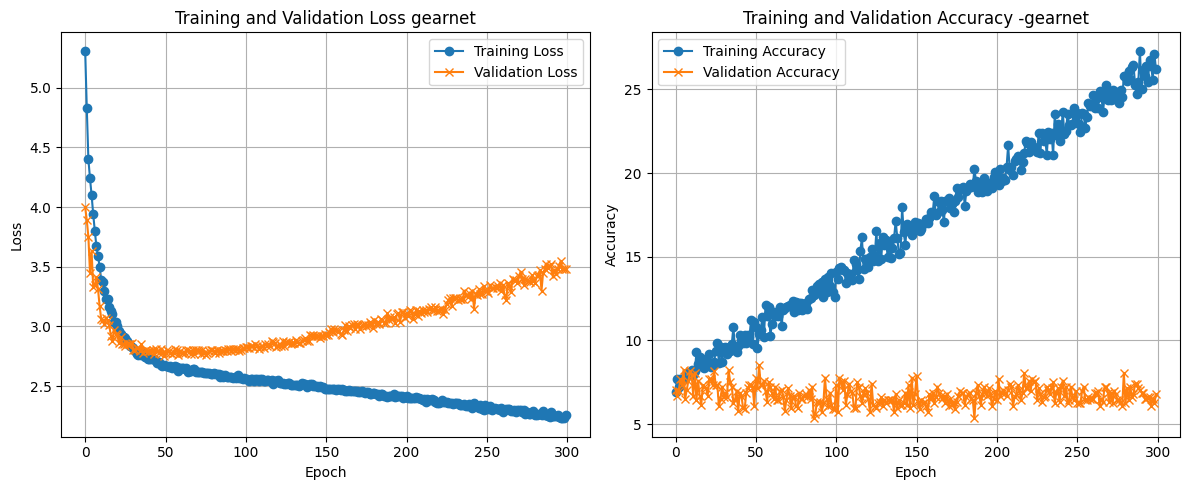

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

# Subplot 1: Loss
plt.subplot(1, 2, 1)
plt.plot(range(len(tloss)), tloss, label='Training Loss', marker='o')
plt.plot(range(len(vloss)), vloss, label='Validation Loss', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss gearnet')
plt.grid()
plt.legend()

# Subplot 2: Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(len(tacc)), tacc, label='Training Accuracy', marker='o')
plt.plot(range(len(vacc)), vacc, label='Validation Accuracy', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy -gearnet')
plt.legend()

# Adjust layout
plt.tight_layout()
plt.grid()
# Show the plot
plt.show()